In [1]:
import numpy as np
import torch 
import torch.nn as nn
import torchvision.datasets as datasets
from torch.autograd import Variable
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
torch.__version__

'0.2.0_3'

In [3]:
x = np.arange(1,50,1).reshape(-1,1)

In [4]:
y = np.array([x**2 +2*x]).reshape(49,1)

In [5]:
labels = LabelEncoder()

In [6]:
y_encoded = labels.fit_transform(y)

/home/rsilveira79/.virtualenvs/pytorch3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


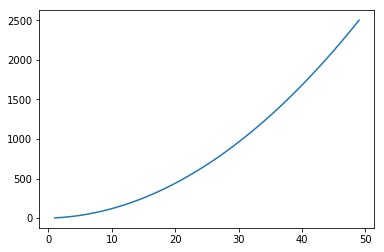

In [7]:
plt.plot(x,y)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y_encoded, test_size = 0.3, random_state = 3)

In [9]:
x_test

array([[13],
       [40],
       [10],
       [47],
       [32],
       [29],
       [14],
       [48],
       [45],
       [ 7],
       [37],
       [24],
       [38],
       [19],
       [ 5]])

In [10]:
regression = LogisticRegression(penalty='l2', max_iter=1000, dual=True)

In [11]:
regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
preds = regression.predict(x_test)

In [13]:
preds

array([48, 48, 32, 48, 48, 48, 48, 48, 48, 20, 48, 48, 48, 48, 14])

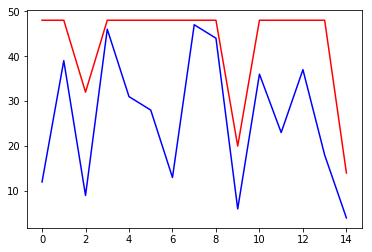

In [14]:
plt.plot(preds,'r')
plt.plot(y_test,'b')
plt.show()

In [15]:
regression.predict([200])

/home/rsilveira79/.virtualenvs/pytorch3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([48])

# Now using the Pytorch package

In [16]:
import math

In [17]:
print("Label 0"+"-"*10)
print(-math.log(1-0.000001))
print(-math.log(1-0.999999))
print("Label 1"+"-"*10)
print(math.log(0.999999))
print(math.log(0.000001))

Label 0----------
1.000000500029089e-06
13.815510557935518
Label 1----------
-1.000000500029089e-06
-13.815510557964274


## Load MNIST Dataset

In [18]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [19]:
train_ds = dsets.MNIST(root="./data", train = True, transform=transforms.ToTensor(), download=False)

In [20]:
len(train_ds)

60000

In [21]:
train_ds[0]

(
 (0 ,.,.) = 
 
 Columns 0 to 8 
    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1176
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1922  0.9333
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0706  0.8588
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.3137
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   

In [22]:
type(train_ds[0])

tuple

In [23]:
# image
train_ds[1][0].size()

torch.Size([1, 28, 28])

In [27]:
# label
train_ds[434][1]

9

In [28]:
for instance in range(5):
    print(train_ds[instance][1])

5
0
4
1
9


### Displaying the image

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
im_5 = train_ds[3][0].numpy().reshape(28,28)

In [31]:
im_5.shape

(28, 28)

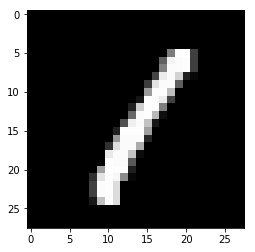

In [32]:
plt.imshow(im_5, cmap='gray')

## Loading the test dataset

In [33]:
test_ds = dsets.MNIST(root="./data", train = False, transform=transforms.ToTensor(), download=False)

In [34]:
len(test_ds)

10000

## Making the dataset iterable

In [71]:
batch_size = 100

In [72]:
n_iters = 5000

In [73]:
num_epochs = n_iters/(len(train_ds)/batch_size)
num_epochs = int(num_epochs)
num_epochs

8

In [38]:
### Create iterable object
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size= batch_size, shuffle=True)

In [39]:
import collections
isinstance(train_loader, collections.Iterable)

True

In [42]:
test_loader = torch.utils.data.DataLoader(dataset=test_ds, batch_size= batch_size, shuffle=False)

In [45]:
isinstance(test_loader, collections.Iterable)

True

# Building the model

In [46]:
class LogisticRegressionTorch(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self,x):
        out = self.linear(x)
        return out

In [48]:
## Instatiate the model class
train_ds[0][0].shape

torch.Size([1, 28, 28])

In [50]:
input_dim = 28*28
output_dim = 10
model = LogisticRegressionTorch(input_dim, output_dim)

In [52]:
type(model)

__main__.LogisticRegressionTorch

In [55]:
## Instantiate the loss class - compute both SoftMax and Cross Entropy
criterion = nn.CrossEntropyLoss()

In [56]:
## Instatiate the optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [62]:
## Model parameters in depth
print(model.parameters())
print(len(list(model.parameters())))
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x7fc48380dd58>
2
torch.Size([10, 784])
torch.Size([10])


## Training the model

In [74]:
iter = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear Gradients
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        output = model(images)
        
        # Calculate loss: softmax --> cross entropy loss
        loss = criterion(output,labels)
        
        # Backpropate errors
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        iter +=1
        
        if iter % 250 ==0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # load images to torch variable
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass
                outputs = model(images)
                
                # Get predictions from the max value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            
            # print loss
            print("Iteration: {}. Loss: {}. Accuracy: {}".format(iter, loss.data[0], accuracy))

Iteration: 250. Loss: 0.5748112201690674. Accuracy: 87.65
Iteration: 500. Loss: 0.5372297167778015. Accuracy: 87.7
Iteration: 750. Loss: 0.7087920904159546. Accuracy: 87.8
Iteration: 1000. Loss: 0.5616717338562012. Accuracy: 87.83
Iteration: 1250. Loss: 0.5833787322044373. Accuracy: 87.85
Iteration: 1500. Loss: 0.4552720785140991. Accuracy: 87.91
Iteration: 1750. Loss: 0.5547133088111877. Accuracy: 87.92
Iteration: 2000. Loss: 0.511910617351532. Accuracy: 87.96
Iteration: 2250. Loss: 0.5581277012825012. Accuracy: 87.97
Iteration: 2500. Loss: 0.40201857686042786. Accuracy: 88.04
Iteration: 2750. Loss: 0.58522629737854. Accuracy: 88.04
Iteration: 3000. Loss: 0.5149683356285095. Accuracy: 88.08
Iteration: 3250. Loss: 0.4308801591396332. Accuracy: 88.12
Iteration: 3500. Loss: 0.6150081157684326. Accuracy: 88.18
Iteration: 3750. Loss: 0.5685945749282837. Accuracy: 88.17
Iteration: 4000. Loss: 0.5602556467056274. Accuracy: 88.21
Iteration: 4250. Loss: 0.5760392546653748. Accuracy: 88.23
Iter

In [75]:
a = np.ones(10)

In [76]:
a

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [125]:
b = np.random.randint(3, size =(1,10))

In [126]:
b

array([[2, 0, 2, 0, 1, 0, 0, 1, 2, 1]])

In [127]:
c =(a == b).sum()

In [128]:
c

3